**Prepared by: Tim Hayes**

**Cohort: PGP-DSBA-UTA-AUG'22-A2**

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language?

Is the time spent on the new page the same for the different language users?
 

### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website


group - Whether the user belongs to the first group (control) or the second group (treatment)


landing_page - Whether the landing page is new or old


time_spent_on_the_page - Time (in minutes) spent by the user on the landing page


converted - Whether the user gets converted to a subscriber of the news portal or not


language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library  of statistical functions.
from scipy.stats import ttest_1samp
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import f_oneway


%matplotlib inline 

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### View the top 5 rows and last 5 rows

In [3]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


In [4]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


#### Observations:
- The DataFrame has 6 columns as mentioned in the Data Dictionary.
- The user_id column appears to be a unique identifier column for users.
- The group column is a categorical column indicating if the user is in the control group or the treatment group.
- landing_page is a categorical column indicating if the new of old landing page was used.
- Additional columns are concerned with amount of time a user spent on a landing page, did they convert to a subscriber and the preferred language.

### Investigate the shape of the data

In [5]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 100 rows and 6 columns


#### Observations:
- There are 100 rows and 6 columns in the DataFrame.

### Check datatypes of Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
- There is one float column, one int64 column and four object columns

### Check for missing values

In [7]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
- There are no missing values in the DataFrame.

### Check for duplicate values

In [8]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations:
- There are no duplicate rows in the DataFrame.

### Get a statistical summary of the data

In [9]:
# Use describe() to get a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


#### Observations:
- user_id is a unique identifier for each of the users.
- The min for time_spent_on_the_page is .190 and the max is 10.71.
- The mean time_spent_on_the_page is 5.378 which indicated that the data is left skewed since the mean is less than 
the median (5.415).

### Create a new_subscriber boolean so we can look for correlation relationships

In [10]:
# Calculate a boolean new_subscriber 1/0 column
df['new_subscriber'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

### Create a new_landing_page boolean so we can look for correlation relationships

In [11]:
# Calculate a boolean landing page 1/0 column
df['new_landing_page'] = df['landing_page'].apply(lambda x: 1 if x == 'new' else 0)

### Utility functions

In [12]:
# Mask to filter out based on landing_page
new_page_mask = (df['landing_page'] == 'new')
old_page_mask = (df['landing_page'] == 'old')

def output_pretty_boxplot(title, df, x, y=None, hue=None, figsize=None):
    '''Output a customized nice looking standardized boxplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);
    
    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue);

    plt.title(title);    
    
def output_pretty_countplot(title, df, x, order=None, hue=None, figsize=None):
    '''Output a customized nice looking standardized countplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(title, df, x):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    plt.title(title);
    plt.show();

def output_pretty_barplot(title, df, x, y, order=None, hue=None):
    '''Output a customized nice looking standardized barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
    ''' 

    g = sns.catplot(data=df,x=x,y=y,kind='bar',order=order, hue=hue);
     
    g.fig.set_size_inches(15, 4)
    g.fig.subplots_adjust(top=0.81, right=0.86)

    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, 0)

    # iterate through the axes containers and add amount to bar
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    
    plt.title(title);
    plt.xticks(rotation=45);
    
def output_pretty_crosstab_plot(title, x, y):
    '''Output a customized nice looking standardized crosstab barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
    ''' 
    crosstab_percentages = pd.crosstab(x, y, normalize='index')
    crosstab_percentages.plot(kind='bar',stacked =True) 
    plt.legend()
    plt.title(title);
    plt.xticks(rotation=45);
    plt.show()
    return crosstab_percentages
    
def percent_diff(old, new):
    '''Calculate percentage difference
    :x: Old percentage
    :y: New percentage
    ''' 
    round_new = round(new,3)
    round_old = round(old,3)
    return ((round_new-round_old)/round_old)*100

### Univariate Analysis

### Lets investigate user_id column

In [13]:
print('The number of unique users are {}'.format(df['user_id'].nunique()))

The number of unique users are 100


### Observations
- There are 100 unique users in the dataset.

### Lets investigate group column

The groups are 
control     0.500
treatment   0.500
Name: group, dtype: float64


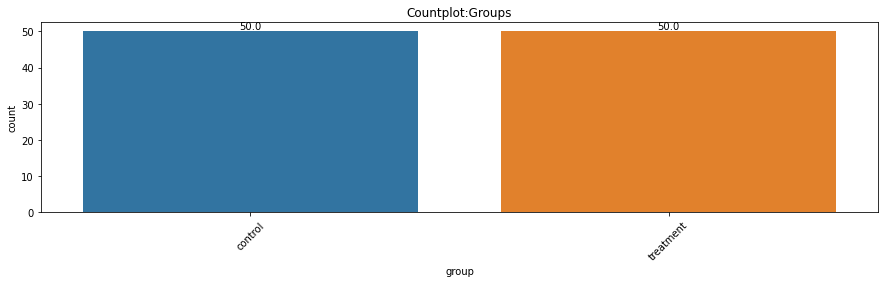

In [14]:
print('The groups are \n{}'.format(df['group'].value_counts(normalize=True)))

# countplot for group
output_pretty_countplot('Countplot:Groups', df, 'group')

### Observations
- Group columns unique values are 'control' and 'treatment'.
- Half the data is for control and half is for treatment.

### Lets investigate landing_page column

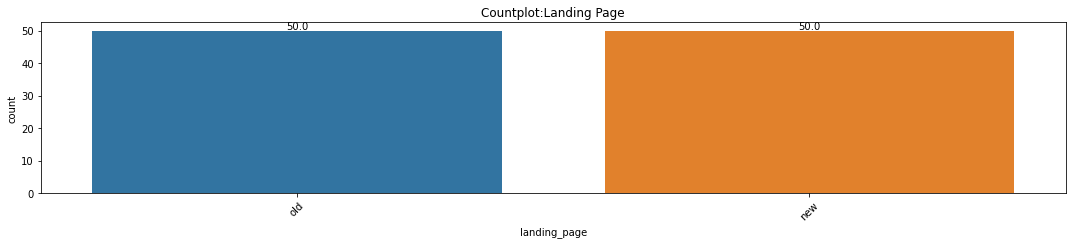

In [15]:
# countplot for group
output_pretty_countplot('Countplot:Landing Page', df, 'landing_page')

### Observations
- Half the visits were for the new landing page and half were for the new landing page.

### Lets investigate time_spent_on_the_page column

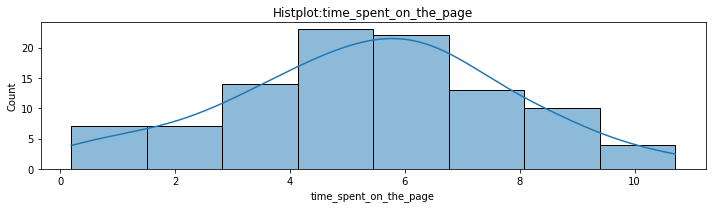

In [16]:
# histplot for rating_numerical
output_pretty_histplot('Histplot:time_spent_on_the_page', df, 'time_spent_on_the_page');

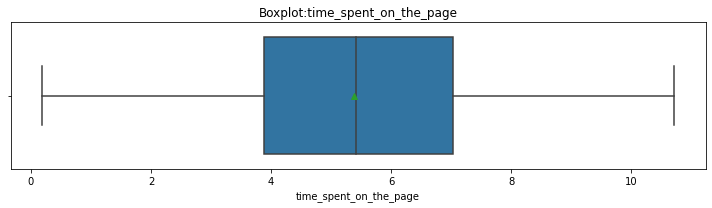

In [17]:
# boxplot for rating_numerical
output_pretty_boxplot('Boxplot:time_spent_on_the_page', df, x='time_spent_on_the_page')

### Observations
- The min for time_spent_on_the_page is .190 and the max is 10.71.
- The mean time_spent_on_the_page is 5.378 which indicated that the data is left skewed since the mean is less than the median (5.415).
- There are no outliers in the data.
- The data is multimodel and has two peaks.

### Lets investigate converted column

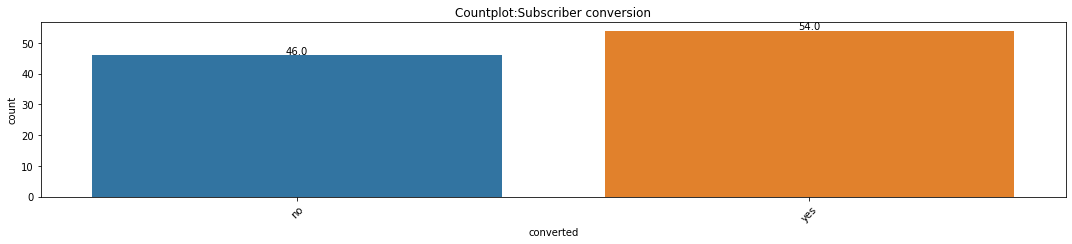

In [18]:
# countplot for group
output_pretty_countplot('Countplot:Subscriber conversion', df, 'converted')

### Observations
- 54 of the 100 visitors converted to a subscriber while 46 did not.

### Lets investigate language_preferred column

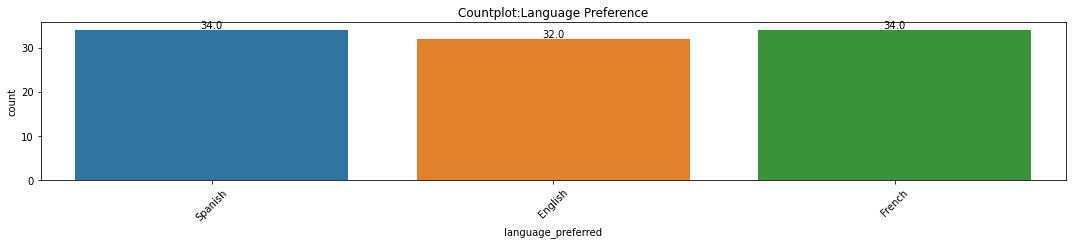

In [19]:
# countplot for group
output_pretty_countplot('Countplot:Language Preference', df, 'language_preferred')

### Observations
- 34 of the visitors preferred Spanish as there language.
- 32 of the visitors preferred English as there language.
- 34 of the visitors preferred French as there language.

### Bivariate Analysis

### Lets investigate feature correlation via a heatmap

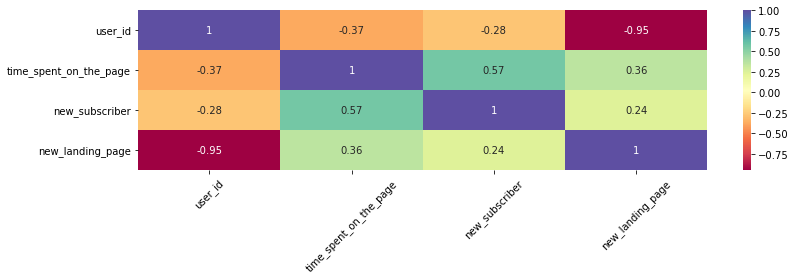

In [20]:
# Determine correlation between numerical variables
plt.figure(figsize=(12,4))
sns.heatmap(data=df.corr(), annot=True, cmap='Spectral');
plt.xticks(rotation=45);

### Observations
- new_subscriber boolean flag is positively correlated (.57) with time_spent_on_the_page.
- new_landing_page boolean flag is positively correlated (.24) with new_subscriber.
- new_landing_page boolean flag is positively correlated (.36) with time_spent_on_the_page.

### Lets investigate landing_page in relation to time_spent_on_the_page

              count  mean   std   min   25%   50%   75%    max
landing_page                                                  
new          50.000 6.223 1.817 1.650 5.175 6.105 7.160 10.710
old          50.000 4.532 2.582 0.190 2.720 4.380 6.442 10.300


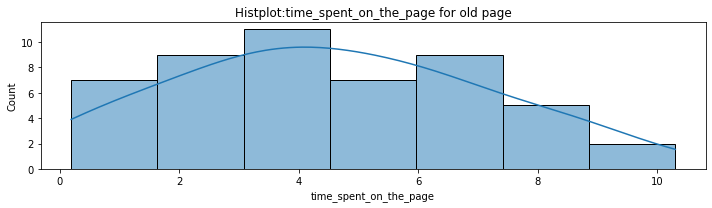

In [21]:
print(df.groupby('landing_page')['time_spent_on_the_page'].describe())

# histplot for time_spent_on_the_page for old page
output_pretty_histplot('Histplot:time_spent_on_the_page for old page', df[old_page_mask],\
                       'time_spent_on_the_page');

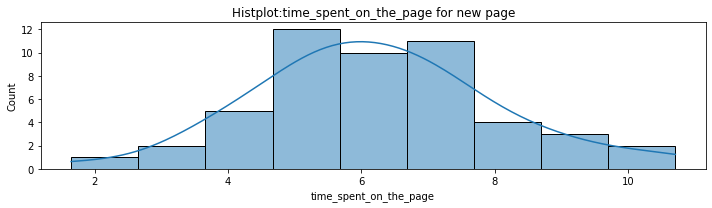

In [22]:
# histplot for time_spent_on_the_page for new page
output_pretty_histplot('Histplot:time_spent_on_the_page for new page', df[new_page_mask],\
                       'time_spent_on_the_page');

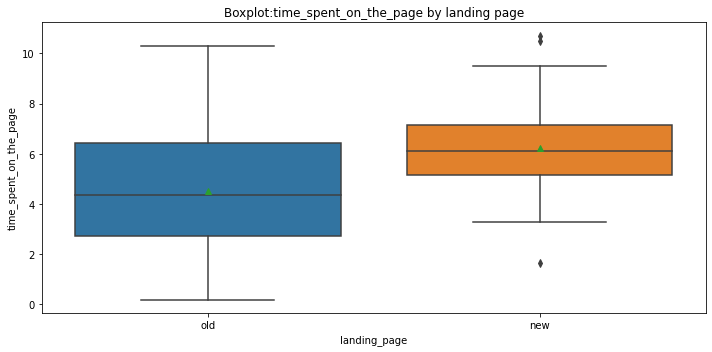

In [23]:
# boxplot for time_spent_on_the_page by landing page
output_pretty_boxplot('Boxplot:time_spent_on_the_page by landing page', df, x='landing_page',\
                     y='time_spent_on_the_page', figsize=(10,5));

### Observations
- The time_spent_on_the_page for the old page is multimodel.
- The mean time on the old page is 4.532 which is greater than the median of 4.38 indicating a right skew.


- The time_spent_on_the_page for the new page is multimodel.
- The mean time on the new page is 6.223 which is greater than the median of 6.105 indicating a right skew.
- The time_spent_on_the_page for the new page has several outliers.


- The kde for the new_page appears more normally distributed than for the old_page.

### Lets investigate landing_page in relation to time_spent_on_the_page by conversion

Median time spent by landing page
landing_page  converted
new           no          4.680
              yes         6.790
old           no          3.050
              yes         6.210
Name: time_spent_on_the_page, dtype: float64

Mean time spent by landing page
landing_page  converted
new           no          4.882
              yes         6.914
old           no          3.349
              yes         6.166
Name: time_spent_on_the_page, dtype: float64


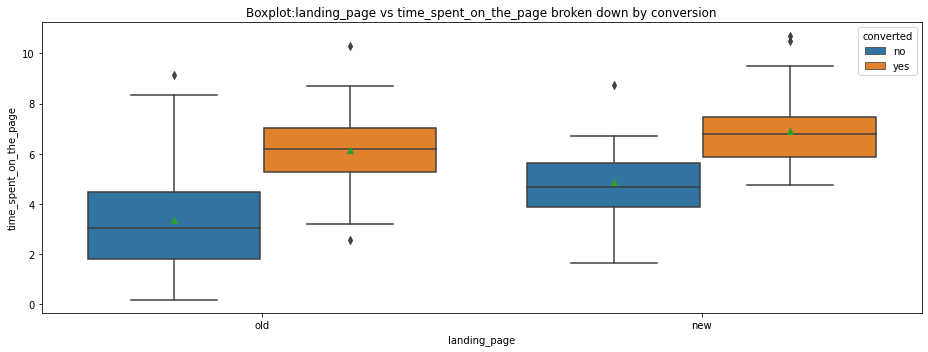

In [24]:
# Output a table of means and medians
print('Median time spent by landing page\n{}'.format(df.groupby(['landing_page','converted'])\
                                          ["time_spent_on_the_page"].median()))
print('\nMean time spent by landing page\n{}'.format(df.groupby(['landing_page','converted'])\
                                          ["time_spent_on_the_page"].mean()))

# Boxplot for landing_page vs time_spent_on_the_page with a conversion hue
output_pretty_boxplot('Boxplot:landing_page vs time_spent_on_the_page broken down by conversion', df,\
                      x='landing_page',y='time_spent_on_the_page',hue='converted',\
                     figsize=(13,5));

### Observations
- For the old landing page for visitors who did not convert the mean time on the page is 3.349 which is greater than the median (3.050) meaning the data is right skewed.
- For the old landing page for visitors who did not convert there are outliers.

- For the old landing page for visitors who did convert the mean time on the page is 6.166 which is less than the median (6.210) meaning the data is left skewed.
- For the old landing page for visitors who converted there are outliers.

- For the new landing page for visitors who did not convert the mean time on the page is 4.882 which is greater than the median (4.68) meaning the data is right skewed.
- For the new landing page for visitors who did not convert there are outliers.

- For the new landing page for visitors who did convert the mean time on the page is 6.914 which is less than the median (6.79) meaning the data is right skewed.
- For the new landing page for visitors who converted there are outliers.


### Lets investigate landing_page in relation to conversion

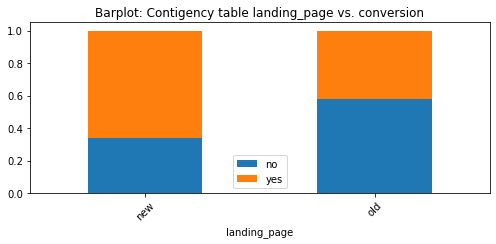

converted,no,yes
landing_page,,
new,0.340,0.660
old,0.580,0.420


In [25]:
# Output crosstab plot of landing_page vs converted
output_pretty_crosstab_plot('Barplot: Contigency table landing_page vs. conversion',\
                           df['landing_page'], df['converted'])

### Observations
- 66% of the visitors who used the new landing page converted to subscribers.
- 42% of the visitors who used the old landing page converted to subscribers.

### Lets investigate landing_page in relation to time_spent_on_the_page by language_preferred

Median for language_preferred
language_preferred  landing_page
English             new            6.865
                    old            3.700
French              new            5.420
                    old            4.180
Spanish             new            6.200
                    old            4.750
Name: time_spent_on_the_page, dtype: float64

Mean for language_preferred
language_preferred  landing_page
English             new            6.664
                    old            4.454
French              new            6.196
                    old            4.310
Spanish             new            5.835
                    old            4.828
Name: time_spent_on_the_page, dtype: float64


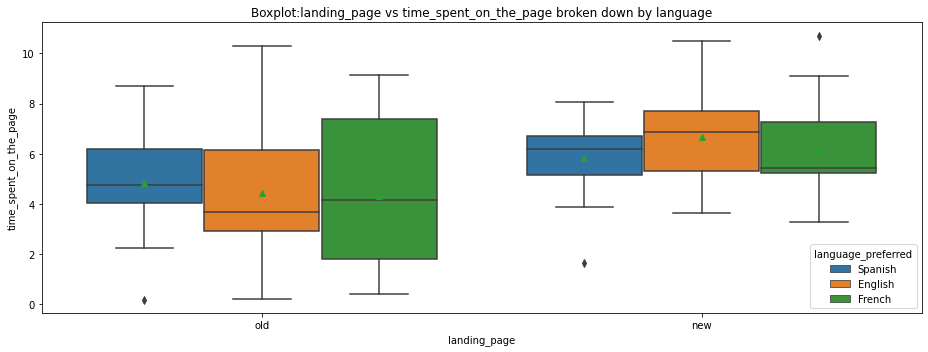

In [26]:
# Output a table of means and medians
print('Median for language_preferred\n{}'.format(df.groupby(['language_preferred','landing_page'])\
                                          ["time_spent_on_the_page"].median()))
print('\nMean for language_preferred\n{}'.format(df.groupby(['language_preferred','landing_page'])\
                                          ["time_spent_on_the_page"].mean()))

# Boxplot for landing_page vs time_spent_on_the_page with a language_preferred hue
output_pretty_boxplot('Boxplot:landing_page vs time_spent_on_the_page broken down by language', df,\
                      x='landing_page',y='time_spent_on_the_page',hue='language_preferred',\
                     figsize=(13,5));

### Observations
- For the old landing page for Spanish visitors the mean time on the page is 4.828 which is greater than the median (4.75) meaning the data is right skewed.
- For the old landing page for Spanish visitors there are outliers.

- For the old landing page for English visitors the mean time on the page is 4.454 which is greater than the median (3.7) meaning the data is right skewed.

- For the old landing page for French visitors the mean time on the page is 4.31 which is greater than the median (4.18) meaning the data is right skewed.


- For the new landing page for Spanish visitors the mean time on the page is 5.835 which is less than the median (6.200) meaning the data is left skewed.
- For the new landing page for Spanish visitors there are outliers.

- For the new landing page for English visitors the mean time on the page is 6.664 which is less than the median (6.865) meaning the data is left skewed.

- For the new landing page for French visitors the mean time on the page is 6.196 which is greater than the median (5.420) meaning the data is right skewed.
- For the new landing page for French visitors there are outliers.

### Lets investigate language_preferred in relation to conversion

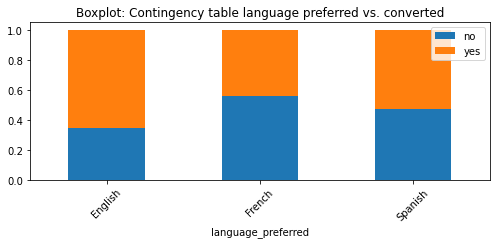

converted,no,yes
language_preferred,,
English,0.344,0.656
French,0.559,0.441
Spanish,0.471,0.529


In [27]:
# Output crosstab plot of language preferred vs converted
output_pretty_crosstab_plot('Boxplot: Contingency table language preferred vs. converted', \
                           df['language_preferred'], df['converted'])

### Observations
- 65.6% of the English language visitors converted to subscribers.
- 44.11% of the French language visitors converted to subscribers.
- 52.9% of the Spanish language visitors converted to subscribers.

### Lets investigate language_preferred in relation to group and conversion

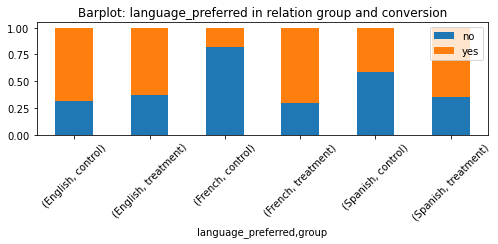

For English speakers the conversion rate improvement from old page to new is -9.16%.
For French speakers the conversion rate improvement from old page to new is 301.14%.
For Spanish speakers the conversion rate improvement from old page to new is 57.04%.


In [28]:
# Output crosstab plot language_preferred in relation group and conversion
language_crosstab = output_pretty_crosstab_plot('Barplot: language_preferred in relation group and conversion',\
                            [df['language_preferred'], df['group']],\
                            df['converted'])

english_improvement = percent_diff(language_crosstab.loc[('English', 'control')]['yes'],
                            language_crosstab.loc[('English', 'treatment')]['yes'])
french_improvement = percent_diff(language_crosstab.loc[('French', 'control')]['yes'],
                            language_crosstab.loc[('French', 'treatment')]['yes'])
spanish_improvement = percent_diff(language_crosstab.loc[('Spanish', 'control')]['yes'],
                            language_crosstab.loc[('Spanish', 'treatment')]['yes'])
print('For English speakers the conversion rate improvement from old page to new is {:.2f}%.'\
      .format(english_improvement))
print('For French speakers the conversion rate improvement from old page to new is {:.2f}%.'\
      .format(french_improvement))
print('For Spanish speakers the conversion rate improvement from old page to new is {:.2f}%.'\
      .format(spanish_improvement))

### Observations
- For English speakers the conversion rate on the old page is 68.8% while on the new page its 62.5% which is a 9.16% drop in conversion. 
- For French speakers the conversion rate on the old page is 17.6% while on the new page its 70.6% which is a 301.14% increase in conversion. 
- For Spanish speakers the conversion rate on the old page is 41.2% while on the new page its 64.7% which is a 57.04% increase in conversion.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

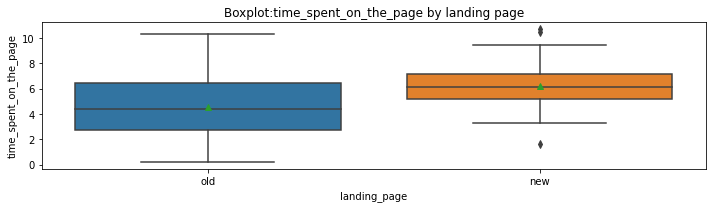

In [29]:
# boxplot for time_spent_on_the_page by landing page
output_pretty_boxplot('Boxplot:time_spent_on_the_page by landing page', df, x='landing_page',\
                     y='time_spent_on_the_page')

### Observations
- The time_spent_on_the_page for the old page is multimodel.
- The mean time on the old page is 4.532 which is greater than the median of 4.38 indicating a right skew.


- The time_spent_on_the_page for the new page is multimodel.
- The mean time on the new page is 6.223 which is greater than the median of 6.105 indicating a right skew.
- The time_spent_on_the_page for the new page has several outliers.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time_spent_on_the_page for the new landing page and the existing landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

In [30]:
# find the sample means and sample standard deviations for the two samples
mean_time_spent_df = df.groupby(['landing_page'], as_index=False)\
                                       [["time_spent_on_the_page"]].mean()
print('\nMean time spent by landing page\n{}'.format(mean_time_spent_df.to_string(index=False)))

stdev_time_spent_df = df.groupby(['landing_page'], as_index=False)\
                                        [['time_spent_on_the_page']].std()
print('\nStddev time spent by landing page\n{}'.format(stdev_time_spent_df.to_string(index=False)))

# Find the mean difference between time spent on the new and old landing page
# to see if there is in fact a difference.
diff = mean_time_spent_df.loc[0,'time_spent_on_the_page'] - \
            mean_time_spent_df.loc[1,'time_spent_on_the_page']
print('\nThe difference of the means for time spent on the new landing page vs the old landing page is {:.2f}'.\
      format(diff))


Mean time spent by landing page
landing_page  time_spent_on_the_page
         new                   6.223
         old                   4.532

Stddev time spent by landing page
landing_page  time_spent_on_the_page
         new                   1.817
         old                   2.582

The difference of the means for time spent on the new landing page vs the old landing page is 1.69


* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent observations - As we are taking the sampled unit randomly, the observed units are independent.
* Random sampling from the population - Yes, we are informed that the collected sample that was split into two
groups is a random sample.

Since the assumptions are satisfied we can use the paired sample T-test for this problem.

### Step 3: Decide the significance level

alpha = 0.5

### Step 4: Collect and prepare data

In [31]:
old_time_on_page = df[old_page_mask]['time_spent_on_the_page'].copy()
new_time_on_page = df[new_page_mask]['time_spent_on_the_page'].copy()

### Step 5: Calculate the p-value

In [32]:
# find the p-value
test_stat, p_value = ttest_rel(new_time_on_page, old_time_on_page, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

- The p-value of 0.00029 is less than the alpha (0.05).

### Step 7:  Draw inference

As the p-value (0.00029) is less than the level of significance (.05), we can reject the null hypothesis. Hence, we do have enough evidence to support visitors on average spend more time on the new landing page compared to the old page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

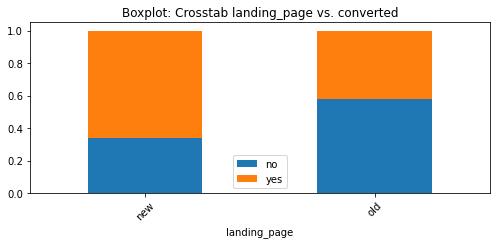

converted,no,yes
landing_page,,
new,0.340,0.660
old,0.580,0.420


In [33]:
# Output crosstab plot landing_page vs. converted
output_pretty_crosstab_plot('Boxplot: Crosstab landing_page vs. converted', \
                            df['landing_page'], df['converted'])

### Observations
- The new landing page has a 66% conversion rate (33/50) new subscribers.
- The old page has a 42% conversion rate (21/50) to new subscribers.

### Step 1: Define the null and alternate hypotheses

Let $p_1, p_2$ be the proportion of visitors visiting the new page and converting to the proportion of visitors visiting the old page and converting respectively.

We will test the null hypothesis

>$H_0:p_1=p_2$

against the alternate hypothesis

>$H_a:p_1>p_2$

### Step 2: Select Appropriate test

*   Binomally distributed population - Yes, the conversion rate for the new page is higher or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

Since the assumptions are satisfied we can use the two proportion Z-test

### Step 3: Decide the significance level

alpha = 0.5

### Step 4: Collect and prepare data

In [34]:
new_page_conversion_count = 33
old_page_conversion_count = 21
new_page_n = 50
old_page_n = 50;

# set the counts of for sucessful conversion rates based on landing_page
conversion_count = np.array([new_page_conversion_count, old_page_conversion_count])

# set the sample sizes
nobs = np.array([new_page_n, old_page_n])

### Step 5: Calculate the p-value

In [35]:
# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs, alternative='larger')
print('The p-value is {}'.format(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

- The p-value of 0.0080263 is less than alpha (0.05).

### Step 7:  Draw inference

As the p-value (0.0080263) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the new page has a conversion rate greater than the old page.

## 3. Is the conversion and preferred language independent or related?

### Perform Visual Analysis

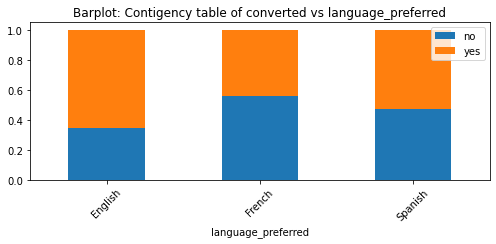

converted,no,yes
language_preferred,,
English,0.344,0.656
French,0.559,0.441
Spanish,0.471,0.529


In [36]:
# Output crosstab plot of converted vs. language preferred vs group
output_pretty_crosstab_plot("Barplot: Contigency table of converted vs language_preferred", \
                            df['language_preferred'], df['converted'])

### Observations
- English speakers converted to subscribers 65.6% of the time.
- French speakers converted to subscribers 44.1% of the time.
- Spanish speakers converted to subscribers 52.9% of the time.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends of preferred language.

### Step 2: Select Appropriate test

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Since the assumptions are satisfied we can use the Chi-Square test for independence

### Step 3: Decide the significance level

In [37]:
alpha = 0.5

### Step 4: Collect and prepare data

In [38]:
# Build a contigency table containing only 'converted', 'language_preferred'
chi2_contigency = pd.crosstab(df['converted'], df['language_preferred'])

# Break out contigency tables based on new and old landing page as well
chi2_new_contigency = pd.crosstab(df[new_page_mask]['converted'], \
                                  df[new_page_mask]['language_preferred'])
chi2_old_contigency = pd.crosstab(df[old_page_mask]['converted'], \
                                  df[old_page_mask]['language_preferred'])

### Step 5: Calculate the p-value

In [39]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(chi2_contigency)
print('The p-value is', p_value)

# find the p-value for the new page exclusively
chi, p_value, dof, expected = chi2_contingency(chi2_new_contigency)
print('The p-value for new landing_page exclusively is', p_value)

# find the p-value for the old page exclusively
chi, p_value, dof, expected = chi2_contingency(chi2_old_contigency)
print('The p-value old landing_page exclusively is', p_value)

The p-value is 0.21298887487543447
The p-value for new landing_page exclusively is 0.8783081441552572
The p-value old landing_page exclusively is 0.012013484079071492


### Step 6: Compare the p-value with $\alpha$

- The p-value of 0.2129 is greater than alpha (0.05).
- That the p-value for new page exclusively 0.8783 is also greater than alpha (0.05).
- That the p-value for old page exclusively 0.012 is less than alpha (0.05). This finding could indicate that the new landing page impacts the dependency between landing_page and language_preferred.

### Step 7:  Draw inference

As the p-value (0.2129) is greater than the level of significance (.05), we fail to reject the null hypothesis. Hence, we do not have enough evidence to support that conversion is dependent on language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

Median time spent by languages for new page
language_preferred
English   6.865
French    5.420
Spanish   6.200
Name: time_spent_on_the_page, dtype: float64

Mean time spent by languages for new page
language_preferred
English   6.664
French    6.196
Spanish   5.835
Name: time_spent_on_the_page, dtype: float64


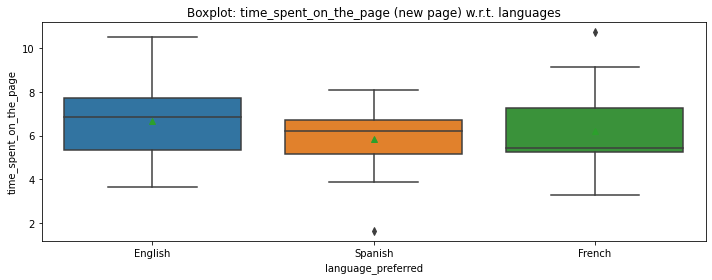

In [40]:
new_mask_df = df[new_page_mask].copy()

# find the sample means and sample standard deviations for the three samples
print('Median time spent by languages for new page\n{}'.format(new_mask_df\
                                                        .groupby("language_preferred")\
                                                               ["time_spent_on_the_page"].median()))
print('\nMean time spent by languages for new page\n{}'.format(new_mask_df\
                                                        .groupby("language_preferred")\
                                                               ["time_spent_on_the_page"].mean()))

# draw the boxplot for visualization 
output_pretty_boxplot('Boxplot: time_spent_on_the_page (new page) w.r.t. languages', new_mask_df,\
                          x='language_preferred', y='time_spent_on_the_page',\
                     figsize=(10,4));

### Observations
- The mean for time_spent_on_the_page for English language is 6.66 which is less than the median (6.86) thus the data is left skewed.
- The mean for time_spent_on_the_page for Spanish language is 5.835 which is less than the median (6.2) thus the data is left skewed.
- The mean for time_spent_on_the_page for French language is 6.196 which is greater than the median (5.42) thus the data is right skewed.

- Spanish language time_spent_on_the_page has an outlier.
- French language time_spent_on_the_page has an outlier.


### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the mean time_spent_on_the_page for the new landing page for language of Spanish, English and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time_spent_on_the_page mean based on language is different from the rest.

### Step 2: Select Appropriate test

#### Test for normality via the Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Mean time_spent_on_the_page for the new landing page for language follows a normal distribution.

against the alternative hypothesis

>$H_a:$ Mean time_spent_on_the_page for the new landing page for language does not follow a normal distribution.

The shapiro() function of Scipy will be used to compute the test statistic and p-value.

In [41]:
# find the p-value
w, p_value = stats.shapiro(new_mask_df['time_spent_on_the_page']) 
print('The Shapiro p-value is', p_value)

The Shapiro p-value is 0.8040016293525696


#### Insight

Since p-value 0.8040 is greater than alpha (.05), we fail to reject the null hypothesis that the response follows the normal distribution

#### Test for equality of variance via the Levene’s test test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [42]:
#Assumption 2: Homogeneity of Variance
statistic, p_value = levene(new_mask_df['time_spent_on_the_page'][new_mask_df['language_preferred']=="English"], 
                            new_mask_df['time_spent_on_the_page'][new_mask_df['language_preferred']=="Spanish"], 
                            new_mask_df['time_spent_on_the_page'][new_mask_df['language_preferred']=="French"])
# find the p-value
print('The Levene p-value is', p_value)

The Levene p-value is 0.46711357711340173


#### Insight
- Since the p-value 0.4671 is greater than alpha, we fail to reject the null hypothesis of homogeneity of variances.

#### Since the above assumptions are satisfied we can use the one-way anova test

### Step 3: Decide the significance level

- alpha = 0.5

### Step 4: Collect and prepare data

In [43]:
spanish_time_spent = new_mask_df.loc[new_mask_df['language_preferred'] == 'Spanish', 'time_spent_on_the_page']
english_time_spent = new_mask_df.loc[new_mask_df['language_preferred'] == 'English', 'time_spent_on_the_page']
french_time_spent = new_mask_df.loc[new_mask_df['language_preferred'] == 'French', 'time_spent_on_the_page']

### Step 5: Calculate the p-value

In [44]:
# perform one-way anova test
test_stat, p_value = f_oneway(spanish_time_spent,
                              english_time_spent, french_time_spent)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

- The p-value of 0.4320 is greater than the significance level alpha (0.05).

### Step 7:  Draw inference

- As the p-value (0.4320) is greater than the level of significance, we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that the mean time_spent_on_the_page for the new landing page for each language is different.

## Conclusion and Business Recommendations

#### Conclusions:
* We do have enough evidence to support visitors on average spend more time on the new landing page compared to the old page.
* We do have enough evidence to support the new page has a conversion rate greater than the old page.
* We do not have enough evidence to support that conversion is dependent on language preferred.
* We do not have enough evidence to support the claim that the mean time_spent_on_the_page for the new landing page for each language is different.
* Overall 66% of the visitors who used the new landing page converted to subscribers while only 42% of the visitors who used the old landing page converted to subscribers.
* 65.6% of the English visitors, 44.1% of the French visitors and 52.9% of Spanish visitors converted to subscribers with respect to new and old landing pages collectively.
* The conversion rate with respect to language_preferred and landing_page (old to new) were mixed with English dropping 9.16%, French increasing 301.14% and Spanish increasing 57.04%.

#### Further analysis that can be done:
* Evaluate the translation for the three languages from the old page to the new to see if this played a role with conversion rate mixed results (i.e. French/Spanish increasing and English decreasing). 
* Evaluate the content on the old and new page with respect to language to see if this played a role with conversion rate mixed results (i.e. French/Spanish increasing and English decreasing). 
* Acquire age and gender data in order to further investigate visitor conversion tendencies.
* Review the approach used to split the randomly selected 100 visitors into the control and treatment subgroups to ensure no bias was introduced.
* Investigate if there are other preferred languages visitors desire outside of English, French and Spanish and rerun analysis.

In [45]:
percent_diff(3.896332308293038, 5.225481758800481)

34.11190965092402

In [46]:
percent_diff(4.544867815395594, 5.225481758800481)

14.961496149614955

___